In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



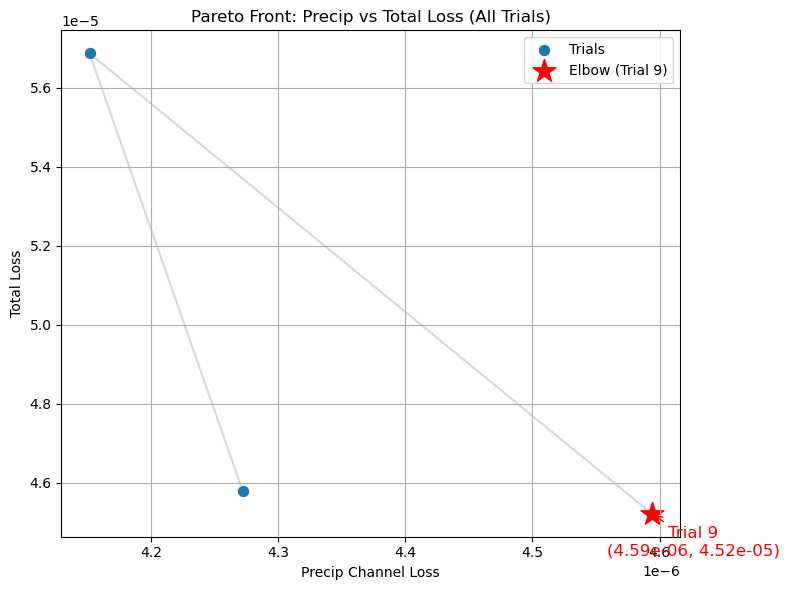

In [10]:
trials = [
    {"trial": 2, "weights": [0.37088430795661265, 0.28739142870873263, 0.1259842388026553, 0.21574002453199936], "precip_loss": 4.2721067075035535e-06, "total_loss": 4.5791308366460726e-05},
    {"trial": 4, "weights": [0.3409522975456359, 0.21091156982278578, 0.15300760078635586, 0.2951285318452225], "precip_loss": None, "total_loss": None},
    {"trial": 5, "weights": [0.3179368825705688, 0.20421553385680483, 0.21765754822529756, 0.2601900353473288], "precip_loss": None, "total_loss": None},
    {"trial": 7, "weights": [0.2968621555115908, 0.16010304693475252, 0.3762780731676935, 0.16675672438596328], "precip_loss": 4.15163958678022e-06, "total_loss": 5.686550911100905e-05},
    {"trial": 9, "weights": [0.46364526483510865, 0.17527617762629688, 0.16111772141098732, 0.1999608361276072], "precip_loss": 4.593957328324905e-06, "total_loss": 4.5216192254725766e-05},
    {"trial": 13, "weights": [0.2854267084603501, 0.12342704922962436, 0.26504839333371744, 0.32609784897630817], "precip_loss": None, "total_loss": None},
    {"trial": 14, "weights": [0.276658797361721, 0.2614184843151571, 0.18710930198999046, 0.27481341633313155], "precip_loss": None, "total_loss": None},
    {"trial": 15, "weights": [0.2892200902768383, 0.27428757495593675, 0.24992464307343903, 0.18656769169378587], "precip_loss": None, "total_loss": None}
]

df = pd.DataFrame(trials)
df = df.dropna(subset=["precip_loss", "total_loss"])

df["distance"] = np.sqrt(df["precip_loss"]**2 + df["total_loss"]**2)
elbow_idx = df["distance"].idxmin()
elbow_trial = df.loc[elbow_idx]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="precip_loss", y="total_loss", s=80, label="Trials")
plt.plot(df["precip_loss"], df["total_loss"], color="gray", alpha=0.3, zorder=0)

plt.scatter(elbow_trial["precip_loss"], elbow_trial["total_loss"], 
            marker="*", s=300, color="red", label=f"Elbow (Trial {elbow_trial['trial']})")

plt.annotate(
    f"Trial {elbow_trial['trial']}\n({elbow_trial['precip_loss']:.2e}, {elbow_trial['total_loss']:.2e})",
    (elbow_trial["precip_loss"], elbow_trial["total_loss"]),
    textcoords="offset points", xytext=(30,-30), ha='center', fontsize=12, color="red",
    arrowprops=dict(arrowstyle="->", color="red")
)

plt.xlabel("Precip Channel Loss")
plt.ylabel("Total Loss")
plt.title("Pareto Front: Precip vs Total Loss (All Trials)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
import sys
sys.path.append("/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling_Models/Combined_Chronological_Dataset")

In [10]:
pr_merged= xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling_Models/Combined_Chronological_Dataset/pr_step1_latlon.nc")["pr"]
tas_merged= xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling_Models/Combined_Chronological_Dataset/tas_step1_latlon.nc")["tas"]
tasmax_merged= xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling_Models/Combined_Chronological_Dataset/tasmax_step1_latlon.nc")["tasmax"]
tasmin_merged= xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/downscaling/sasthana/Downscaling/Downscaling_Models/Combined_Chronological_Dataset/tasmin_step1_latlon.nc")["tasmin"]



In [11]:
print(f"Dimensions of pr_merged: {pr_merged}")
print(f"Dimensions of tas_merged: {tas_merged}")
print(f"Dimensions of tasmax_merged: {tasmax_merged}")
print(f"Dimensions of tasmin_merged: {tasmin_merged}")

Dimensions of pr_merged: <xarray.DataArray 'pr' (time: 113591, N: 265, E: 370)> Size: 89GB
[11137597550 values with dtype=float64]
Coordinates:
    lon      (time, N, E) float32 45GB ...
    lat      (time, N, E) float32 45GB ...
  * time     (time) datetime64[ns] 909kB 1763-01-01 1763-01-02 ... 2023-12-31
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06
Dimensions of tas_merged: <xarray.DataArray 'tas' (time: 113591, N: 240, E: 370)> Size: 40GB
[10086880800 values with dtype=float32]
Coordinates:
    lon      (time, N, E) float32 40GB ...
    lat      (time, N, E) float32 40GB ...
  * time     (time) datetime64[ns] 909kB 1763-01-01 1763-01-02 ... 2023-12-31
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.064e+06 1.066e+06 ... 1.302e+06 1.304e+06
Attributes:
    long_name:     daily mean temperature
    units:         degC
    

In [9]:

print(pr_merged.coords)
print(tas_merged.coords)
print(tasmax_merged.coords)
print(tasmin_merged.coords)

Coordinates:
  * time     (time) datetime64[ns] 909kB 1763-01-01 1763-01-02 ... 2023-12-31
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.06e+06 1.06e+06 1.062e+06 ... 1.322e+06 1.324e+06
Coordinates:
  * time     (time) datetime64[ns] 909kB 1763-01-01 1763-01-02 ... 2023-12-31
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.064e+06 1.066e+06 ... 1.302e+06 1.304e+06
Coordinates:
  * time     (time) datetime64[ns] 909kB 1763-01-01 1763-01-02 ... 2023-12-31
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.064e+06 1.066e+06 ... 1.302e+06 1.304e+06
Coordinates:
  * time     (time) datetime64[ns] 909kB 1763-01-01 1763-01-02 ... 2023-12-31
  * E        (E) float64 3kB 2.474e+06 2.476e+06 ... 2.842e+06 2.844e+06
  * N        (N) float64 2kB 1.064e+06 1.066e+06 ... 1.302e+06 1.304e+06


In [4]:
import sys
sys.path.append("../../Scripts/Functions/Metrics")

In [6]:
from RMSE_R_squared import pooled_RMSE

BICUBIC BASELINES for train, test and val for all four variables 

RMSE

Precipitation

In [ ]:
pred_path = 'data/Features/Split_Data/Test/rhiresd_features_test.nc'
truth_path = ''
var1 = 'RhiresD'
var2 = 'RhiresD'

rmse_grid_rhiresd_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_rhiresd_bicubic)

In [ ]:
pred_path = ''
truth_path = ''
var1 = 'TabsD'
var2 = 'TabsD'

rmse_grid_tabsd_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_tabsd_bicubic)

In [ ]:
pred_path = ''
truth_path = ''
var1 = 'TminD'
var2 = 'TminD'

rmse_grid_tmin_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_tmin_bicubic)

In [ ]:
pred_path = ''
truth_path = ''
var1 = 'TmaxD'
var2 = 'TmaxD'

rmse_grid_tmax_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_tmax_bicubic)

In [31]:
rmse_pooled_tabsd_bilinear= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_tabsd_bilinear.compute())

<xarray.DataArray ()> Size: 4B
array(2.0581782, dtype=float32)


PRECIPITATION BILINEAR BASELINE


In [ ]:
pred_path = 'Test/features_precip_masked_bilinear_test.nc'
truth_path = 'Test/targets_precip_masked_test.nc'
var1 = 'pr'
var2 = 'RhiresD'

rmse_grid_precip_bilinear = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_precip_bilinear)

In [ ]:
rmse_pooled_precip_bilinear= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_precip_bilinear.compute())

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

BICUBIC BASELINES 

RhiresD and TabsD, pooled and gridded RMSE

TabsD gridded and pooled RMSE : only calculated for the testing set chosen using the splitting scheme from train test val.py and processed in Data_prep.ipynb

In [ ]:
pred_path = '/Test/features_tas_masked_bicubic_test.nc'
truth_path = 'Test/targets_tas_masked_test.nc'
var1 = 'tas'
var2 = 'TabsD'

rmse_grid_tabsd_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_tabsd_bicubic)

In [18]:
rmse_pooled_tabsd_bicubic= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_tabsd_bicubic.compute())

<xarray.DataArray ()> Size: 4B
array(1.9994707, dtype=float32)


In [19]:
#Plotting the RMSE on a gridded map of switrzerland 

For precipitation 

In [ ]:
pred_path = 'Test/features_precip_masked_bicubic_test.nc'
truth_path = 'Test/targets_precip_masked_test.nc'
var1 = 'pr'
var2 = 'RhiresD'

rmse_grid_precip_bicubic = gridded_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(rmse_grid_precip_bicubic)

In [ ]:
rmse_pooled_precip_bicubic= pooled_RMSE(pred_path, truth_path, var1, var2, chunk_size={'time': 50})
print(rmse_pooled_precip_bicubic.compute())

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxCoefficient of Determination xxxxxxxxxxxxxxxxxxxxxxxxxx

COEFFICIENT OF DETERMINATION (R squared)

In [5]:
from R_squared import gridded_R_squared
from R_squared import pooled_R_squared

TEMPERATURE (BILINEAR BASELINE)

In [ ]:
pred_path = 'Test/features_tas_masked_bilinear_test.nc'
truth_path = 'Test/targets_tas_masked_test.nc'
var1 = 'tas'
var2 = 'TabsD'

R_grid_tabsd_bilinear = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_tabsd_bilinear)

In [19]:
#Pooled R^2 for bilinearly interpolated temperature

In [ ]:
r2_bilinear_tabsd = pooled_R_squared(
    pred_path=pred_path, 
    truth_path=truth_path, 
    var1="tas", 
    var2="TabsD",
    chunk_size={'time': 100}  
)

print(f"{r2_bilinear_tabsd.values}")


PRECIPITATION 


In [ ]:
pred_path = 'Test/features_precip_masked_bilinear_test.nc'
truth_path = 'Bilinear/Test/targets_precip_masked_test.nc'
var1 = 'pr'
var2 = 'RhiresD'

R_grid_rhiresd_bilinear = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_rhiresd_bilinear)

In [12]:
#Pooled R squared for precip : bilinearly interpolated 

In [ ]:
r2_bilinear_rhiresd = pooled_R_squared(
    pred_path=pred_path, 
    truth_path=truth_path, 
    var1="pr", 
    var2="RhiresD",
    chunk_size={'time': 100}  
)

print(f"{r2_bilinear_rhiresd.values}")

BICUBIC INTERPOLATION : COEFFICIENT OF DETERMINATION

In [ ]:
pred_path = 'Bicubic/Test/features_tas_masked_bicubic_test.nc'
truth_path = 'Bicubic/Test/targets_tas_masked_test.nc'
var1 = 'tas'
var2 = 'TabsD'

R_grid_tabsd_bicubic = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_tabsd_bicubic)

Bicubically inteproilated tabsd : pooled R^2

In [ ]:
r2_bicubic_tabsd = pooled_R_squared(
    pred_path=pred_path, 
    truth_path=truth_path, 
    var1="tas", 
    var2="TabsD",
    chunk_size={'time': 100}  
)

print(f"{r2_bicubic_tabsd.values}")

PRECIPITATION BICUBIC COEFF of DETERMINATION

In [ ]:
pred_path = 'Bicubic/Test/features_precip_masked_bicubic_test.nc'
truth_path = 'Bicubic/Test/targets_precip_masked_test.nc'
var1 = 'pr'
var2 = 'RhiresD'

R_grid_rhiresd_bicubic = gridded_R_squared(pred_path, truth_path, var1, var2, chunk_size={'time': 50})

print(R_grid_rhiresd_bicubic)

Bicubic precipitation : coeff of determination

In [ ]:
r2_bicubic_rhiresd = pooled_R_squared(
    pred_path=pred_path, 
    truth_path=truth_path, 
    var1="pr", 
    var2="RhiresD",
    chunk_size={'time': 100}  
)

print(f"{r2_bicubic_rhiresd.values}")